# Lab Practice Ensemble learning 1.1:  BOOTSTRAP  | Machine Learning II
#### ESU  Jan-2023

---
## Import modules

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data management (dataframes)
import matplotlib.pyplot as plt  # plotting
import seaborn as sns  # plotting
from scipy import stats # basic statistics

from sklearn.linear_model import LinearRegression
from sklearn.utils import resample  # allows implementing bootstrap

---
## 1. The bootstrap approach

Bootstrap is commonly used to quantify the uncertainty associated with a given estimator or statistical learning method. The bootstrap can be applied to many problems and methods, and is commonly used to estimate the standard errors of the coefficients estimated from model fits, or the distribution of error metrics, for example.

One of the great advantages of the bootstrap approach is that it can be applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis entails only two steps: 

- First, decide which are the statistics of interest.
- Second, create a function that computes the statistic of interest (boot_function).
- Third, perform the bootstrap by repeatedly sampling observations from the data set with replacement.
- Fourth, analyse the bootstrap results to estimate the variability.

#### 1.1 Set the dataset

In [2]:
# create a basic original dataset
data = {'Name': ['Ines', 'Clara', 'Juan', 'Pedro'],
        'Age': [20, 21, 19, 18]}

df = pd.DataFrame(data)
df

,Name,Age
0,Ines,20
1,Clara,21
2,Juan,19
3,Pedro,18


#### 1.2 Set the function to compute the variables of interest

In [3]:
# Create the function that computes the statistic of interest
def boot_function (df_bag):
    """
    Receives a dataframe with the bootstrapped resample (bag)
    Returns a new dataframe consisting of the values computed with the bag of data
    """
    # compute desired values from the particular bootstrapped sample
    boot_stats_1 = np.mean(df_bag.Age)
    boot_stats_2 = np.median(df_bag.Age)
    #boot_stats_3 = np.var(df_bag.Age)

    # save in a dataframe for output
    d = dict(stats_1=boot_stats_1, 
             stats_2=boot_stats_2)

    boot_stats = pd.DataFrame([d])
    
    return boot_stats

#### 1.3 Run the bootstrap approach to get the values of the variables of interest for each boot sample

In [4]:
# set the ramdom seed for reproductivility
np.random.seed(9999)

# Defining number of bootstrap (re)samples
n_boots = 1000

# Initializing DataFrame, to hold bootstrapped statistics
bootstrapped_stats = pd.DataFrame()

# In each iteration a bootstrap sample is formed
for i in range(n_boots):

    # sampling the original data in two sets: tr (train) and ts (test)
    train_set = resample(df,                # original dataframe for resampling
                         replace=True,      # sampling n_samples from data, with replacement
                         n_samples=len(df)) # the train_set sample has the same size than the original df
    
    # the test set consists of all observations not in train (usefull for computing OOB stats)
    test_set = df[~df.index.isin(train_set.index)]

    # show the bootstrap sample
    print(f'Boot {i} : ', '\tTRAIN =', train_set['Name'].tolist(), '\t\t\tTEST =', test_set['Name'].tolist())
    
    # compute bootstrapped stats using the training set
    bootstrapped_stats_i = boot_function(train_set)
    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats, bootstrapped_stats_i])


Boot 0 :  	TRAIN = ['Juan', 'Clara', 'Juan', 'Clara'] 			TEST = ['Ines', 'Pedro']
Boot 1 :  	TRAIN = ['Pedro', 'Clara', 'Juan', 'Clara'] 			TEST = ['Ines']
Boot 2 :  	TRAIN = ['Ines', 'Clara', 'Clara', 'Juan'] 			TEST = ['Pedro']
Boot 3 :  	TRAIN = ['Pedro', 'Ines', 'Ines', 'Juan'] 			TEST = ['Clara']
Boot 4 :  	TRAIN = ['Ines', 'Ines', 'Clara', 'Juan'] 			TEST = ['Pedro']
Boot 5 :  	TRAIN = ['Clara', 'Pedro', 'Clara', 'Ines'] 			TEST = ['Juan']
Boot 6 :  	TRAIN = ['Juan', 'Pedro', 'Juan', 'Ines'] 			TEST = ['Clara']
Boot 7 :  	TRAIN = ['Pedro', 'Ines', 'Ines', 'Juan'] 			TEST = ['Clara']
Boot 8 :  	TRAIN = ['Ines', 'Ines', 'Ines', 'Clara'] 			TEST = ['Juan', 'Pedro']
Boot 9 :  	TRAIN = ['Juan', 'Pedro', 'Clara', 'Pedro'] 			TEST = ['Ines']
Boot 10 :  	TRAIN = ['Clara', 'Juan', 'Pedro', 'Juan'] 			TEST = ['Ines']
Boot 11 :  	TRAIN = ['Clara', 'Pedro', 'Pedro', 'Clara'] 			TEST = ['Ines', 'Juan']
Boot 12 :  	TRAIN = ['Pedro', 'Clara', 'Clara', 'Clara'] 			TEST = ['Ines', 'Juan']
Boot 13

#### 1.4 Analyse the bootstrap values to estimate the variability with the sample of the variables of interest

Head of the dataframe with the bootstrapped values:
   stats_1  stats_2
0    20.00     20.0
0    19.75     20.0
0    20.25     20.5
0    19.25     19.5
0    20.00     20.0
Evolution with the bootstrap sample


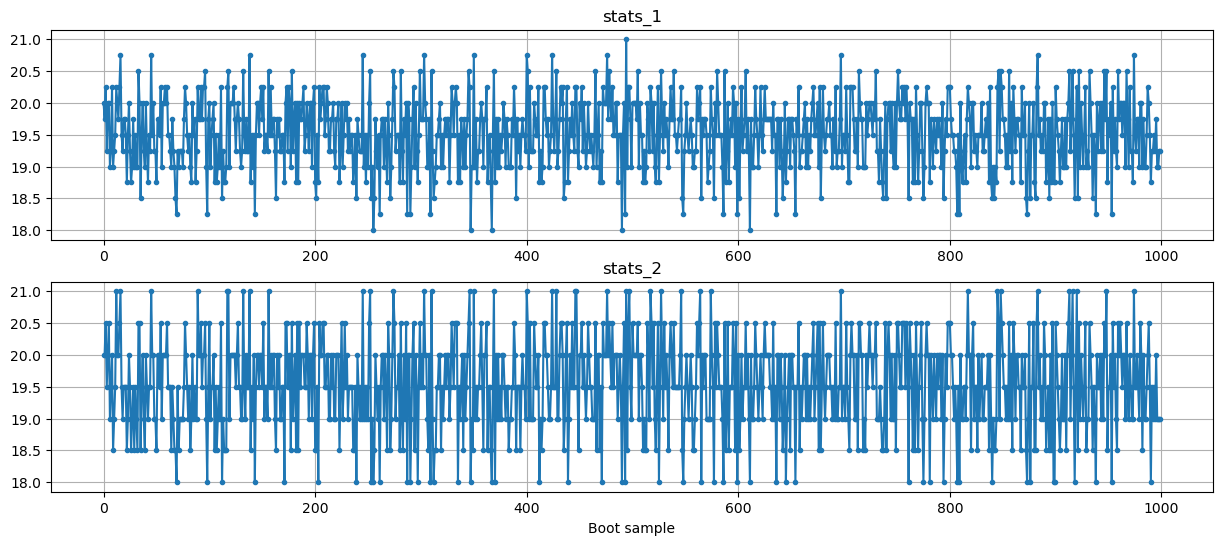

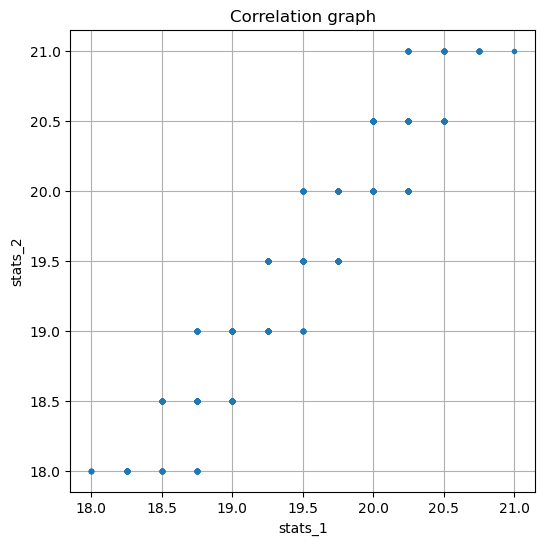

In [5]:
# Use the bootstrapped_stats to study the variability of the computed stats
print('Head of the dataframe with the bootstrapped values:')
print(bootstrapped_stats.head())

print('Evolution with the bootstrap sample')
fig = plt.figure(1, figsize=(15, 6)) 
plt.subplot(2,1,1)
plt.plot(bootstrapped_stats.stats_1.to_list(), '.-')
plt.title('stats_1')
plt.grid()
plt.subplot(2,1,2)
plt.plot(bootstrapped_stats.stats_2.to_list(), '.-')
plt.title('stats_2')
plt.xlabel('Boot sample')
plt.grid()
plt.show()

fig = plt.figure(2, figsize=(6, 6)) 
plt.plot(bootstrapped_stats.stats_1.to_list(), bootstrapped_stats.stats_2.to_list(), '.')
plt.xlabel('stats_1')
plt.ylabel('stats_2')
plt.title('Correlation graph')
plt.grid()
plt.show()


Main descriptive statistics:
           stats_1      stats_2
count  1000.000000  1000.000000
mean     19.522750    19.536500
std       0.549064     0.733113
min      18.000000    18.000000
10%      18.750000    18.500000
25%      19.250000    19.000000
50%      19.500000    19.500000
75%      20.000000    20.000000
90%      20.250000    20.500000
max      21.000000    21.000000

Correlation matrix:
         stats_1  stats_2
stats_1   1.0000   0.9423
stats_2   0.9423   1.0000

Empirical distribution of the stats:


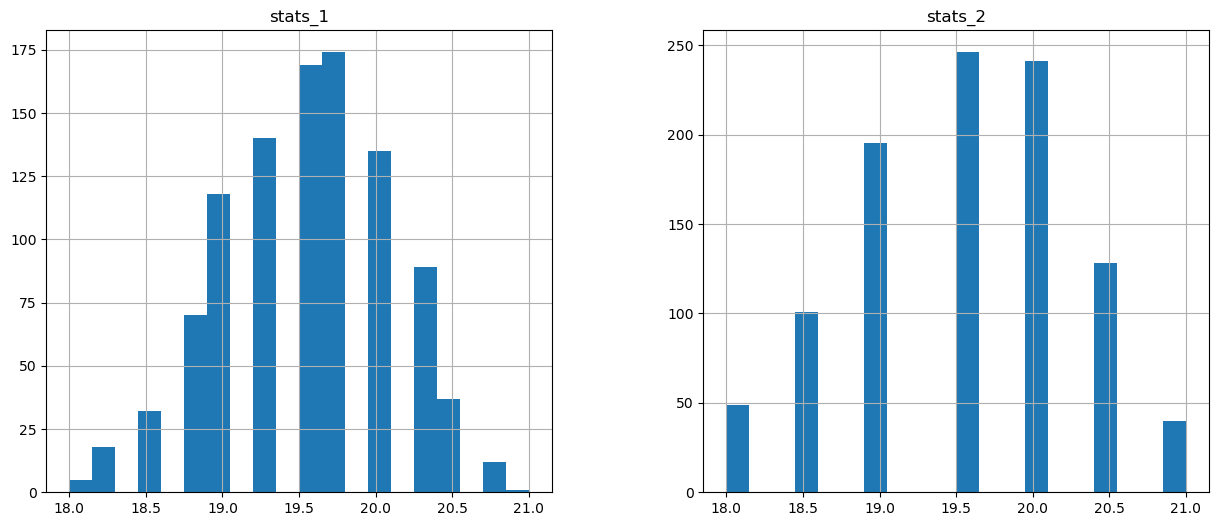

In [6]:
# Results from the bootstrap

# Overview of the stats
print('Main descriptive statistics:')
print(bootstrapped_stats.describe(percentiles=[0.1,0.25,0.75,0.9]))

# correlation matrix
mat_corr = bootstrapped_stats.corr()
print('\nCorrelation matrix:')
print(np.round(mat_corr, 4))

# histograms
print('\nEmpirical distribution of the stats:')
bootstrapped_stats.hist(figsize=(15, 6), bins = 20, sharex = False)
plt.draw()

---
### 2. A Simple case: Variance of the Sample Mean Estimator

The sampling distribution of a mean is generated by repeated sampling from the same population and recording of the sample means obtained. This forms a distribution of different means, and this distribution has its own mean and variance. Theory says that the variance of the sampling mean distribution obtained is equal to the variance of the population divided by the sample size.

#### 2.1 Create the simulated data

In [7]:
# set the ramdom seed for reproductivility
np.random.seed(99999)

In [8]:
# TRUE (UNKNOWN) DISTRIBUTION (i.e. POPULATION) random variable ~ Normal(mu = 10, std = 2)

# create random variable 
mean_true = 10
std_true = 2
var_true = std_true**2
RV = stats.norm(loc = mean_true, scale = std_true)

# sample
# random sample from the random variable (random variates)
sample_size = 10000
y = RV.rvs(size = sample_size)

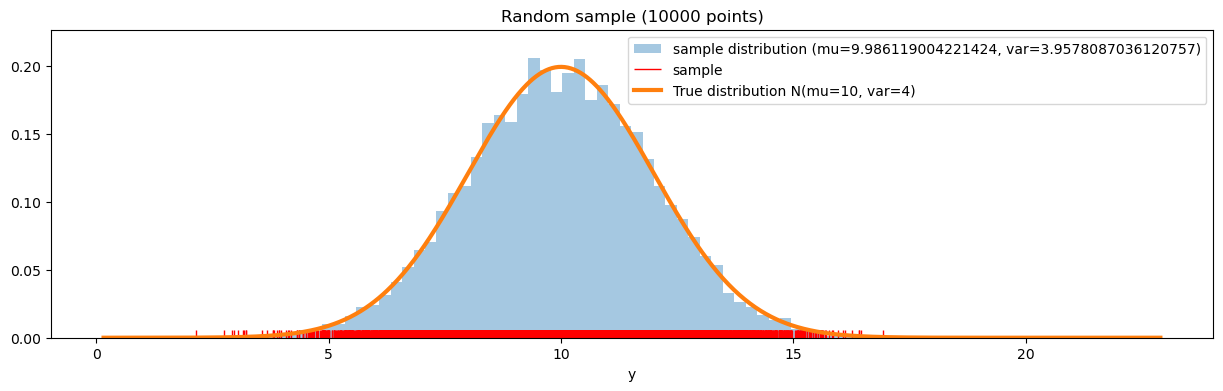

In [9]:
# plot histogram of y for visual checking
xs = np.linspace(min(y)-np.std(y),max(y)+3*np.std(y), 1000)
pdf_true = RV.pdf(xs)

fig = plt.figure(1, figsize=(15, 4))
plt.hist(y, bins=60, density = True, alpha = 0.4, label = f'sample distribution (mu={np.mean(y)}, var={np.var(y)})')
sns.rugplot(y, color='r', label = 'sample')
plt.plot(xs, pdf_true, linewidth = 3, label=f'True distribution N(mu={mean_true}, var={var_true})')
plt.xlabel('y')
plt.legend()
plt.title(f'Random sample ({len(y)} points)')
plt.show()

#### 2.2. The Sample mean estimator (basic in statistical inference)
see https://en.wikipedia.org/wiki/Sample_mean_and_covariance

In [10]:
# THEORETICAL SAMPLE MEAN ESTIMATOR

# create random variable
mean_sm_theo = mean_true

var_sm_theo = var_true / sample_size  # variance of the sample mean estimator (theoretical result)
std_sm_theo = np.sqrt(var_sm_theo)

SM_theo = stats.norm(loc = mean_sm_theo, scale = std_sm_theo)

In [11]:
# Estimate from the sample the mean and variance of the sample mean estimator 
mean_sample = np.mean(y)
var_sample = np.var(y)

# estimates of the mean and variance of the estimator (empirical)
mean_sm_emp = mean_sample

var_sm_emp = var_sample / sample_size  # variance of the sample mean estimator (theoretical result)
std_sm_emp = np.sqrt(var_sm_emp)

# SAMPLE ESTIMATOR DISTRIBUTION with params estimated from the sample
SM_emp = stats.norm(loc = mean_sm_emp, scale = std_sm_emp)


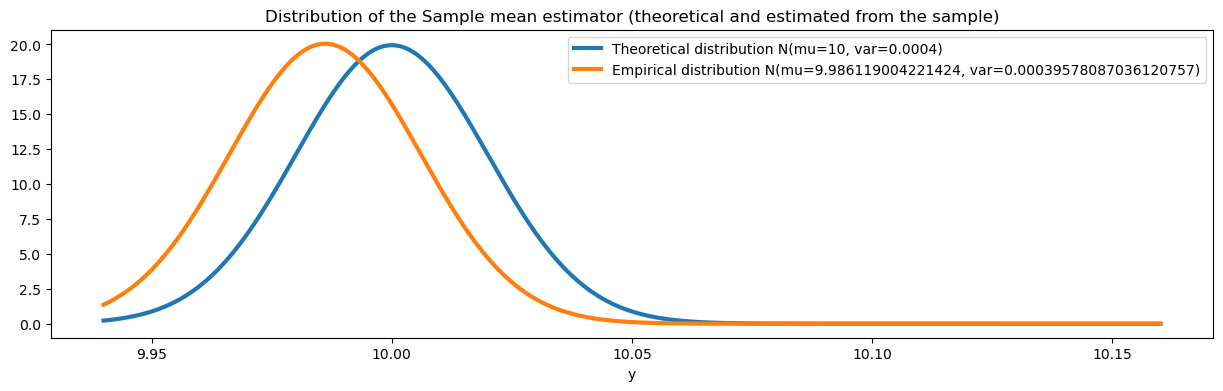

In [12]:
# plot theoretical distribution of the sample mean estimator
xs = np.linspace(SM_theo.mean()-3*SM_theo.std(),SM_theo.mean()+8*SM_theo.std(), 1000)
pdf_SM_theo = SM_theo.pdf(xs)
pdf_SM_emp = SM_emp.pdf(xs)

fig = plt.figure(1, figsize=(15, 4))
plt.plot(xs, pdf_SM_theo, linewidth = 3, label=f'Theoretical distribution N(mu={mean_sm_theo}, var={var_sm_theo})')
plt.plot(xs, pdf_SM_emp, linewidth = 3, label=f'Empirical distribution N(mu={mean_sm_emp}, var={var_sm_emp})')
plt.xlabel('y')
plt.legend()
plt.title('Distribution of the Sample mean estimator (theoretical and estimated from the sample)')
plt.show()

##### 2.3 Apply the bootstrap approach

In [13]:
# Prepare the dataframe for easy 
data = {'y': y}
df = pd.DataFrame(data)
df

,y
0,11.248188
1,12.549926
2,6.680793
3,11.015900
4,9.558172
...,...
9995,7.309307
9996,9.246731
9997,14.759205
9998,8.396199


In [14]:
# Create the function that computes the mean and variance
def boot_function_mean_var (df_bag):
    """
    Receives a dataframe with the bootstrapped resample (bag)
    Returns a new dataframe consisting of the values computed with the bag of data
    """
    # compute desired values from the particular bootstrapped sample
    boot_stats_1 = np.mean(df_bag.y)
    boot_stats_2 = np.var(df_bag.y)

    # save in a dataframe for output
    d = dict(stats_1=boot_stats_1, 
             stats_2=boot_stats_2)

    boot_stats = pd.DataFrame([d])
    
    return boot_stats

In [15]:
# check the function
st = boot_function_mean_var (df.iloc[:100])
st

,stats_1,stats_2
0,10.151379,4.014722


In [16]:
# run bootstrap

# set the ramdom seed for reproductivility
np.random.seed(99999)

# Defining number of bootstrap (re)samples
n_boots = 5000

# Initializing DataFrame, to hold bootstrapped statistics
bootstrapped_stats = pd.DataFrame()

# In each iteration a bootstrap sample is formed
for i in range(n_boots):

    # sampling the original data in two sets: tr (train) and ts (test)
    train_set = resample(df,                # original dataframe for resampling
                         replace=True,      # sampling n_samples from data, with replacement
                         n_samples=len(df)) # the train_set sample has the same size than the original df
    
    # the test set consists of all observations not in train (usefull for computing OOB stats)
    test_set = df[~df.index.isin(train_set.index)]
    
    # compute bootstrapped stats using the training set
    bootstrapped_stats_i = boot_function_mean_var(train_set)
    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats, bootstrapped_stats_i])

Main descriptive statistics:
           stats_1      stats_2
count  5000.000000  5000.000000
mean      9.985838     3.955776
std       0.019686     0.055246
min       9.916836     3.744325
10%       9.960699     3.883392
25%       9.972562     3.918762
50%       9.985537     3.957386
75%       9.999277     3.993417
90%      10.010793     4.025316
max      10.061128     4.139769

Correlation matrix:
         stats_1  stats_2
stats_1   1.0000  -0.0212
stats_2  -0.0212   1.0000

Empirical distribution of the stats:


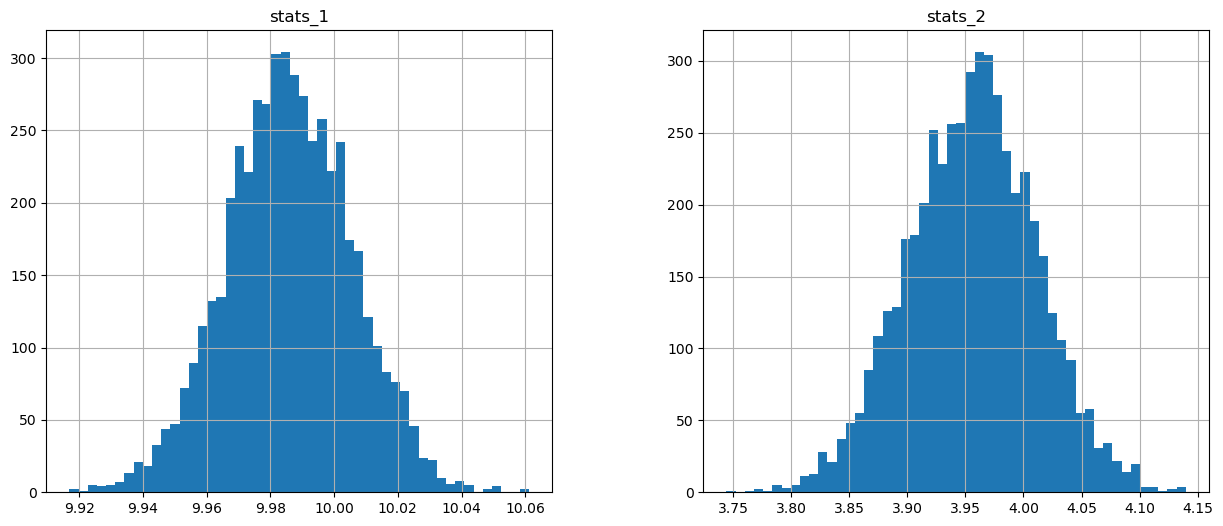

In [17]:
# Overview of the stats
print('Main descriptive statistics:')
print(bootstrapped_stats.describe(percentiles=[0.1,0.25,0.75,0.9]))

# correlation matrix
mat_corr = bootstrapped_stats.corr()
print('\nCorrelation matrix:')
print(np.round(mat_corr, 4))

# histograms
print('\nEmpirical distribution of the stats:')
bootstrapped_stats.hist(figsize=(15, 6), bins = 50, sharex = False)
plt.draw()

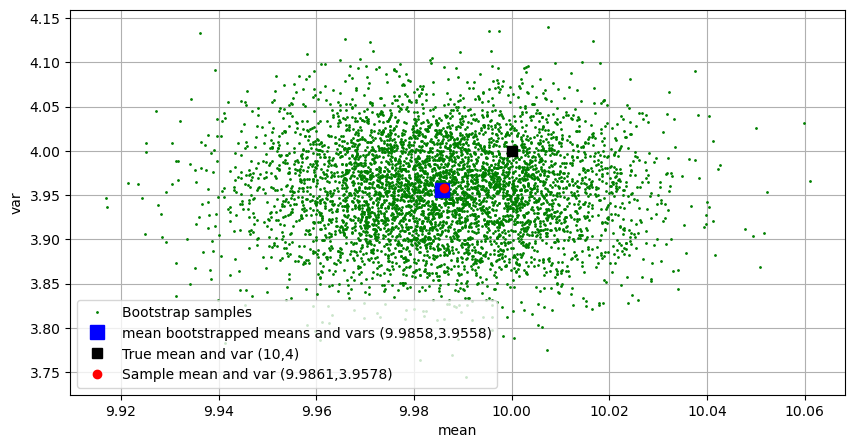

In [18]:
# Compare variance of the mean estimator according to bootstrap and theory
mean_boots_means = np.mean(bootstrapped_stats.stats_1)
mean_boots_vars =  np.mean(bootstrapped_stats.stats_2)

# Show all the statistics together
fig = plt.figure(1, figsize=(10, 5))
plt.plot(bootstrapped_stats.stats_1, bootstrapped_stats.stats_2, '.', color='g', markersize = 2, label = 'Bootstrap samples')
plt.plot(mean_boots_means, mean_boots_vars, 's', color='b', markersize = 10, label = f'mean bootstrapped means and vars ({np.round(mean_boots_means,4)},{np.round(mean_boots_vars,4)})')
plt.plot(mean_true, var_true, 's', color='k', markersize = 7, label = f'True mean and var ({mean_true},{var_true})')
plt.plot(mean_sample, var_sample, 'o', color='r', markersize = 6, label = f'Sample mean and var ({np.round(mean_sample,4)},{np.round(var_sample,4)})')
plt.xlabel('mean')
plt.ylabel('var')
plt.legend()
plt.grid()
plt.show()

---
### 3. A more complex case: Simple linear regression estimation

see https://en.wikipedia.org/wiki/Simple_linear_regression#Unbiasedness

#### 3.1 Create the simulated data

In [19]:
# set the ramdom seed for reproductivility
np.random.seed(99999)

In [20]:
# TRUE (UNKNOWN) REGRESSION LINE
# y = beta_0 + beta_1 * x + E
# where E is a r.v.  ~ Normal(mu = 0, std = 3)

# the straight line (deterministic part)
sample_size = 100
beta_0_true = 2
beta_1_true = 5
x = np.linspace(0,1,num=sample_size)
y_det_true = beta_0_true + beta_1_true * x

# create the random variable for the noise
std_err_true = 3
E = stats.norm(loc = 0, scale = std_err_true)

# sample
# random sample from the random variable
y = y_det_true + E.rvs(size = sample_size)

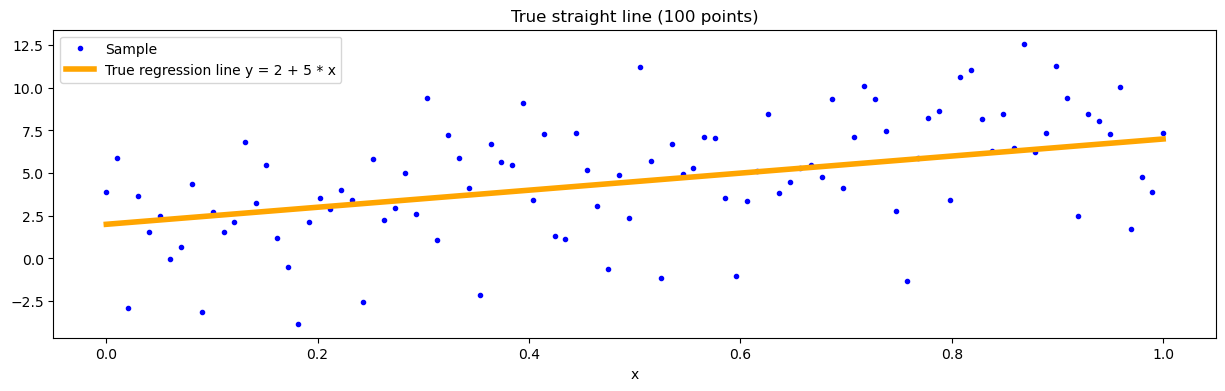

In [21]:
# plot the true line and the points for visual checking
fig = plt.figure(1, figsize=(15, 4))
plt.plot(x,y,'.',color='blue', label='Sample')
plt.plot(x,y_det_true,'-',color='orange', linewidth = 4, label=f'True regression line y = {beta_0_true} + {beta_1_true} * x')
plt.xlabel('x')
plt.legend()
plt.title(f'True straight line ({len(y)} points)')
plt.show()

#### 2.3 Fit regression line using the sample

In [22]:
# Prepare the dataframe for easy 
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
df

,x,y
0,0.000000,3.872282
1,0.010101,5.875394
2,0.020202,-2.877801
3,0.030303,3.675365
4,0.040404,1.539278
...,...,...
95,0.959596,10.064511
96,0.969697,1.710121
97,0.979798,4.789165
98,0.989899,3.917434


Text(0.5, 1.0, 'y = 1.6296074429013538 + 6.1949230229773775 * x   (R-squared = 0.26799585973853957)')

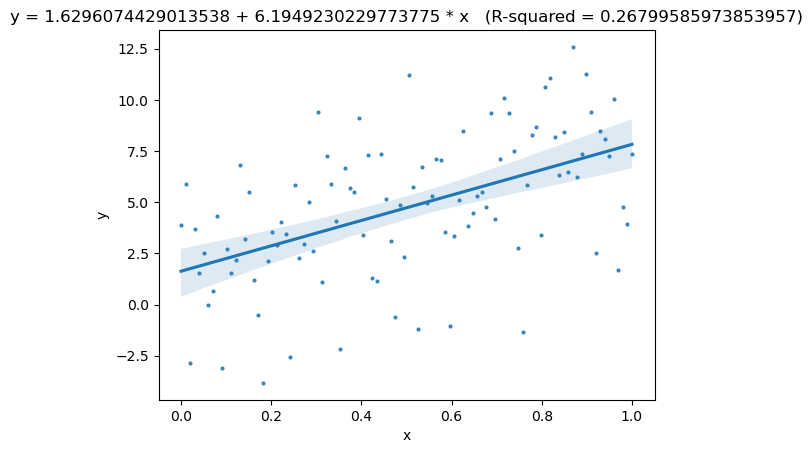

In [23]:
# fit regression line using of the available data
lin_reg_sample = LinearRegression()
lin_reg_sample.fit(df[['x']], df[['y']]) 

beta_0_sample=lin_reg_sample.intercept_[0]
beta_1_sample=lin_reg_sample.coef_.ravel()[0]
r_squared_sample=lin_reg_sample.score(df[['x']], df[['y']])

# plot the resulting regression line and a 95% confidence interval for that regression:
sns.regplot(x="x", y="y", data=df, scatter_kws={"s": 4});
plt.title(f'y = {beta_0_sample} + {beta_1_sample} * x   (R-squared = {r_squared_sample})')

# Si genero 100 muestras de 100 puntos cada una, y calculo la recta de regresión para cada una de ellas, 
# con una confianza del 95% la recta de regresión estará en la banda de confianza.

##### 2.4 Apply the bootstrap approach

In [24]:
# Create the function that computes the mean and variance
def boot_function_regress_line (df_bag):
    """
    Receives a dataframe with the bootstrapped resample (bag)
    Returns a new dataframe consisting of the values computed with the bag of data
    """
    # compute desired values from the particular bootstrapped sample
    X = df_bag[['x']]
    y = df_bag[['y']]

    # fit the simple regression line
    lin_reg = LinearRegression()  # Initializing estimator
    lin_reg.fit(X, y)  # Fitting linear regression model using the bag set

    # save in a dataframe for output
    d = dict(beta_0=lin_reg.intercept_[0], 
             beta_1=lin_reg.coef_.ravel()[0],
             r_squared = lin_reg.score(X, y))

    boot_stats = pd.DataFrame([d])
    
    return boot_stats


In [25]:
# check the function
st = boot_function_regress_line (df)
st

,beta_0,beta_1,r_squared
0,1.629607,6.194923,0.267996


In [26]:
# run bootstrap

# set the ramdom seed for reproductivility
np.random.seed(99999)

# Defining number of bootstrap (re)samples
n_boots = 5000

# Initializing DataFrame, to hold bootstrapped statistics
bootstrapped_stats = pd.DataFrame()

# In each iteration a bootstrap sample is formed
for i in range(n_boots):

    # sampling the original data in two sets: tr (train) and ts (test)
    train_set = resample(df,                # original dataframe for resampling
                         replace=True,      # sampling n_samples from data, with replacement
                         n_samples=len(df)) # the train_set sample has the same size than the original df
    
    # the test set consists of all observations not in train (usefull for computing OOB stats)
    test_set = df[~df.index.isin(train_set.index)]
    
    # compute bootstrapped stats using the training set
    bootstrapped_stats_i = boot_function_regress_line(train_set)
    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats, bootstrapped_stats_i])

Main descriptive statistics:
            beta_0       beta_1    r_squared
count  5000.000000  5000.000000  5000.000000
mean      1.625684     6.199172     0.273494
std       0.576878     1.022100     0.071353
min      -0.591778     2.178435     0.037834
10%       0.880059     4.867745     0.181667
25%       1.231897     5.513223     0.225609
50%       1.638417     6.199572     0.272224
75%       2.014606     6.882724     0.320332
90%       2.370409     7.506089     0.365680
max       3.973572     9.824384     0.556130

Correlation matrix:
           beta_0  beta_1  r_squared
beta_0     1.0000 -0.8523    -0.6990
beta_1    -0.8523  1.0000     0.8835
r_squared -0.6990  0.8835     1.0000

Empirical distribution of the stats:


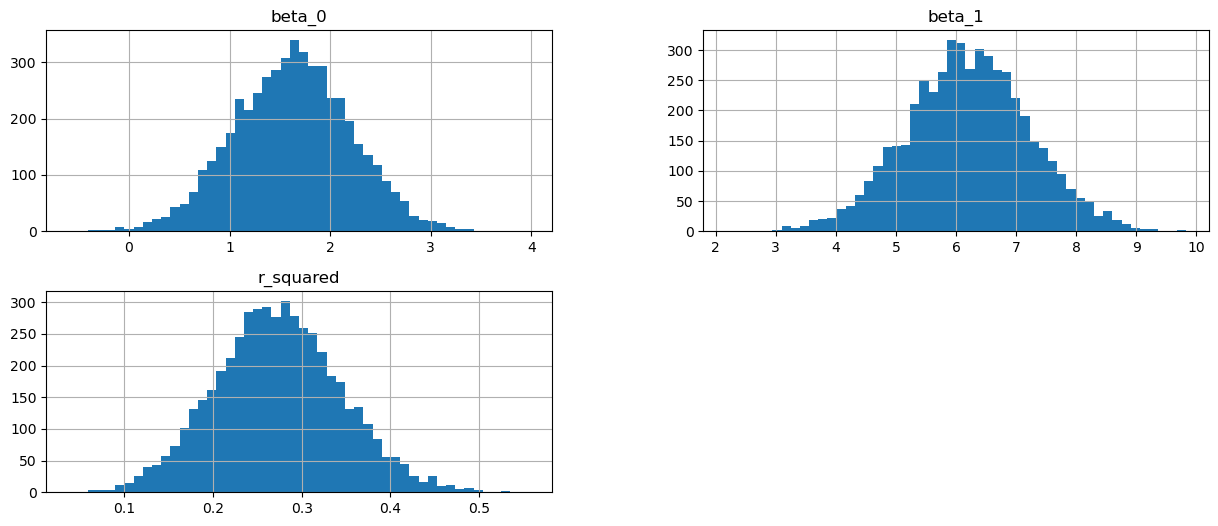

In [27]:
# Overview of the stats
print('Main descriptive statistics:')
print(bootstrapped_stats.describe(percentiles=[0.1,0.25,0.75,0.9]))

# correlation matrix
mat_corr = bootstrapped_stats.corr()
print('\nCorrelation matrix:')
print(np.round(mat_corr, 4))

# histograms
print('\nEmpirical distribution of the stats:')
bootstrapped_stats.hist(figsize=(15, 6), bins = 50, sharex = False)
plt.draw()

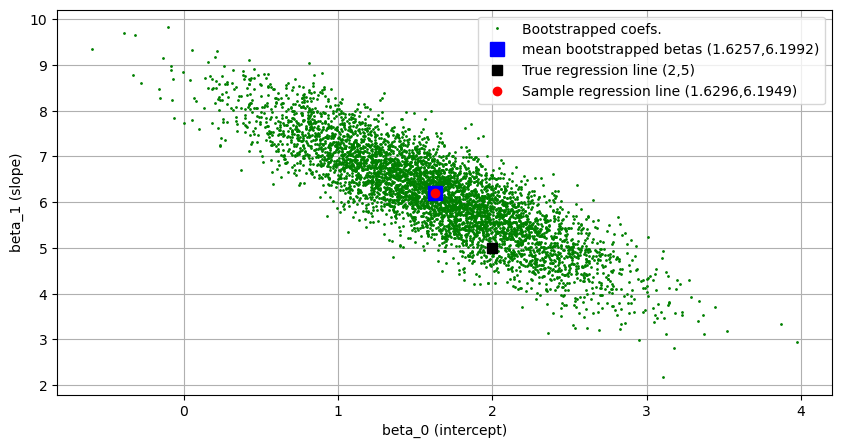

In [28]:
# Compare true line with estimated ones
mean_boots_beta_0 = np.mean(bootstrapped_stats.beta_0)
mean_boots_beta_1 =  np.mean(bootstrapped_stats.beta_1)

# Show all the statistics together
fig = plt.figure(1, figsize=(10, 5))
plt.plot(bootstrapped_stats.beta_0, bootstrapped_stats.beta_1, '.', color='g', markersize = 2, label = 'Bootstrapped coefs.')
plt.plot(mean_boots_beta_0, mean_boots_beta_1, 's', color='b', markersize = 10, label = f'mean bootstrapped betas ({np.round(mean_boots_beta_0,4)},{np.round(mean_boots_beta_1,4)})')
plt.plot(beta_0_true, beta_1_true, 's', color='k', markersize = 7, label = f'True regression line ({beta_0_true},{beta_1_true})')
plt.plot(beta_0_sample, beta_1_sample, 'o', color='r', markersize = 6, label = f'Sample regression line ({np.round(beta_0_sample,4)},{np.round(beta_1_sample,4)})')
plt.xlabel('beta_0 (intercept)')
plt.ylabel('beta_1 (slope)')
plt.legend()
plt.grid()
plt.show()

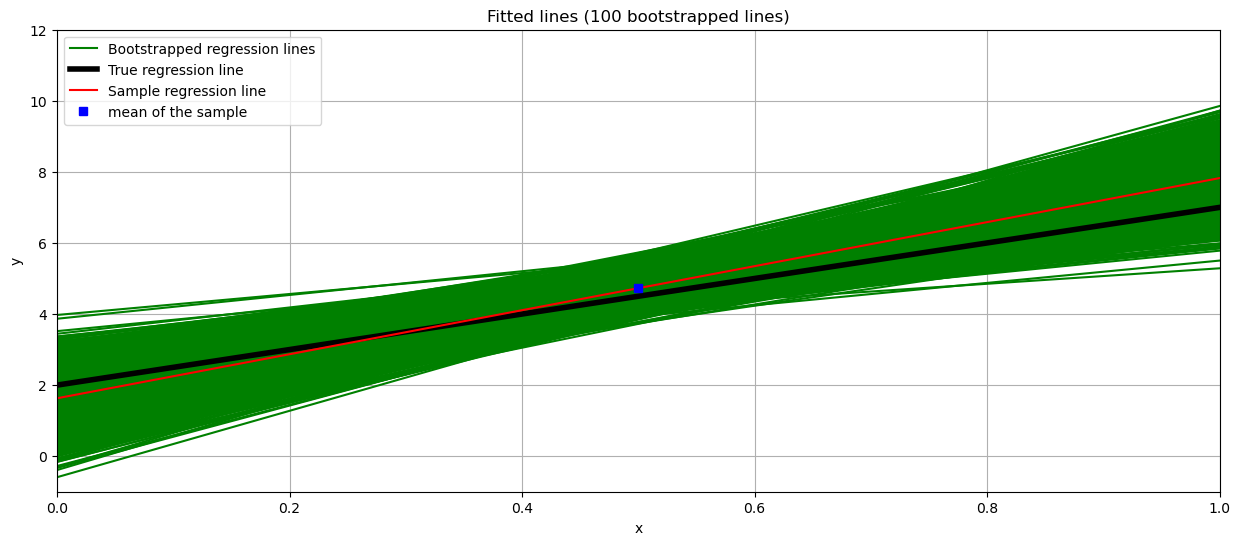

In [29]:
# show all the bootstrapped lines together for visual checking of the CONFIDENCE BAND provided by the bootstrap approach
fig = plt.figure(1, figsize=(15, 6))

plt.axline((0, bootstrapped_stats.iloc[0].beta_0), slope=bootstrapped_stats.iloc[0].beta_1, color = 'green', label ='Bootstrapped regression lines')
for i in range(1,n_boots):
    plt.axline((0, bootstrapped_stats.iloc[i].beta_0), slope=bootstrapped_stats.iloc[i].beta_1, color = 'green')

plt.plot(x,y_det_true,'-',color='black', linewidth = 4, label='True regression line')
plt.axline((0,beta_0_sample), slope=beta_1_sample, color = 'red', label = 'Sample regression line')
plt.plot(np.mean(df["x"]),np.mean(df["y"]), 's',color='blue', label = 'mean of the sample')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-1,12])
plt.grid()
plt.legend()
plt.title(f'Fitted lines ({len(y)} bootstrapped lines)')
plt.show()